### Plots

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

safe_globals = {"NaN": math.nan,"None": None,}

with open('/mnt/letitia/scratch/students/hhammoud/detr/outputs/concat_fixed/log.txt', 'r') as f:
    logs = f.readlines()
    logs = [eval(line.strip(), safe_globals) for line in logs if line.strip()]

In [5]:
logs[-1].keys()

dict_keys(['train_lr', 'train_superclass_error_step1', 'train_superclass_error_step2', 'train_subclass_error_step1', 'train_subclass_error_step2', 'train_coord_error_step1', 'train_coord_error_step2', 'train_radiomics_error_step1', 'train_radiomics_error_step2', 'train_loss', 'train_loss_step1', 'train_loss_step2', 'train_scheduled_sampling_prob', 'train_using_prediction', 'test_t1_superclass_f1', 'test_t1_superclass_precision', 'test_t1_superclass_recall', 'test_t1_subclass_precision', 'test_t2_subclass_f1', 'test_t1_superclass_accuracy', 'test_t2_feature_error_std', 'test_t1_hierarchical_accuracy', 'test_t2_coord_error_std', 'test_t2_subclass_accuracy', 'test_t2_superclass_precision', 'test_t1_subclass_f1', 'test_t2_subclass_recall', 'test_t2_feature_error_mean', 'test_t2_superclass_recall', 'test_t1_subclass_recall', 'test_t2_subclass_precision', 'test_t2_superclass_f1', 'test_t1_feature_error_mean', 'test_t1_coord_error_mean', 'test_t1_feature_error_std', 'test_t1_subclass_accuracy

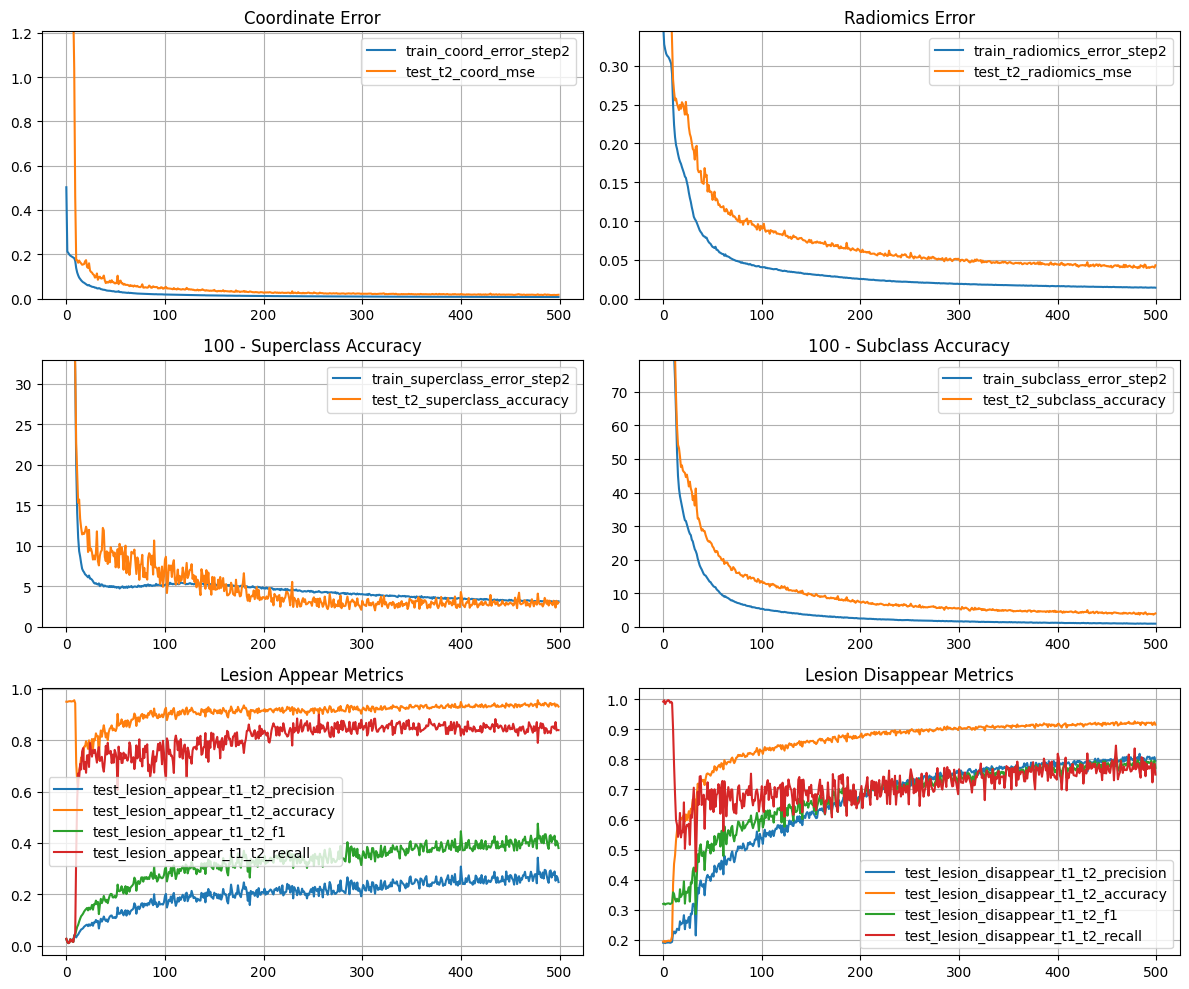

In [19]:
fig, axs = plt.subplots(3, 2, figsize=(12, 10))
axs = axs.flatten()

keys01 = [
    ("train_coord_error_step1", "test_t1_coord_mse", "Coordinate Error", False),
    ("train_radiomics_error_step1", "test_t1_radiomics_mse", "Radiomics Error", False),
    ("train_superclass_error_step1", "test_t1_superclass_accuracy", "100 - Superclass Accuracy", True),
    ("train_subclass_error_step1", "test_t1_subclass_accuracy", "100 - Subclass Accuracy", True),
    (("test_lesion_appear_t0_t1_precision", "test_lesion_appear_t0_t1_accuracy", "test_lesion_appear_t0_t1_f1", "test_lesion_appear_t0_t1_recall"), None, "Lesion Appear Metrics", False),
    (("test_lesion_disappear_t0_t1_precision", "test_lesion_disappear_t0_t1_accuracy", "test_lesion_disappear_t0_t1_f1", "test_lesion_disappear_t0_t1_recall"), None, "Lesion Disappear Metrics", False),
]

keys12 = [
    ("train_coord_error_step2", "test_t2_coord_mse", "Coordinate Error", False),
    ("train_radiomics_error_step2", "test_t2_radiomics_mse", "Radiomics Error", False),
    ("train_superclass_error_step2", "test_t2_superclass_accuracy", "100 - Superclass Accuracy", True),
    ("train_subclass_error_step2", "test_t2_subclass_accuracy", "100 - Subclass Accuracy", True),
    (("test_lesion_appear_t1_t2_precision", "test_lesion_appear_t1_t2_accuracy", "test_lesion_appear_t1_t2_f1", "test_lesion_appear_t1_t2_recall"), None, "Lesion Appear Metrics", False),
    (("test_lesion_disappear_t1_t2_precision", "test_lesion_disappear_t1_t2_accuracy", "test_lesion_disappear_t1_t2_f1", "test_lesion_disappear_t1_t2_recall"), None, "Lesion Disappear Metrics", False),
]

keys = keys12

for i, (train_key, test_key, title, invert) in enumerate(keys):
    ax = axs[i]
    if isinstance(train_key, tuple):
        for key in train_key:
            values = [log[key] for log in logs if key in log]
            ax.plot(values, label=key)
        ax.set_title(title)
        ax.legend()
    else:
        train_values = [log[train_key] for log in logs if train_key in log]
        ax.plot(train_values, label=train_key)
        if test_key:
            test_values = [log[test_key] for log in logs if test_key in log]
            if invert:
                test_values = [100 - 100*v for v in test_values]
            ax.plot(test_values, label=test_key)
        ax.set_title(title)
        ax.legend()
        ax.set_ylim(0, max(max(train_values), max(test_values)) * 0.8)
    ax.grid()

plt.tight_layout()
plt.show()

### Tragectory 

Using device: cuda
Total common IDs: 46
IDs >= 20: 31 ([20, 27, 30, 34, 36, 37, 38, 40, 41, 42, 44, 46, 47, 48, 49, 51, 52, 56, 57, 58, 61, 67, 68, 72, 73, 74, 75, 83, 84, 85, 88])
Randomly selected IDs to plot: [49, 44, 47, 56, 41, 83, 40, 61, 51, 46]
Available predicted IDs TP1: [0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 15, 17, 18, 19, 20, 22, 24, 27, 28, 30, 33, 34, 36, 37, 38, 40, 41, 42, 44, 46, 47, 48, 49, 51, 52, 56, 57, 58, 61, 64, 65, 67, 68, 72, 73, 74, 75, 78, 83, 84, 85, 87, 88, 89, 91]
Available predicted IDs TP2: [0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 17, 18, 19, 20, 22, 24, 27, 30, 34, 35, 36, 37, 38, 40, 41, 42, 44, 46, 47, 48, 49, 51, 52, 56, 57, 58, 61, 65, 67, 68, 72, 73, 74, 75, 78, 83, 84, 85, 88, 91]


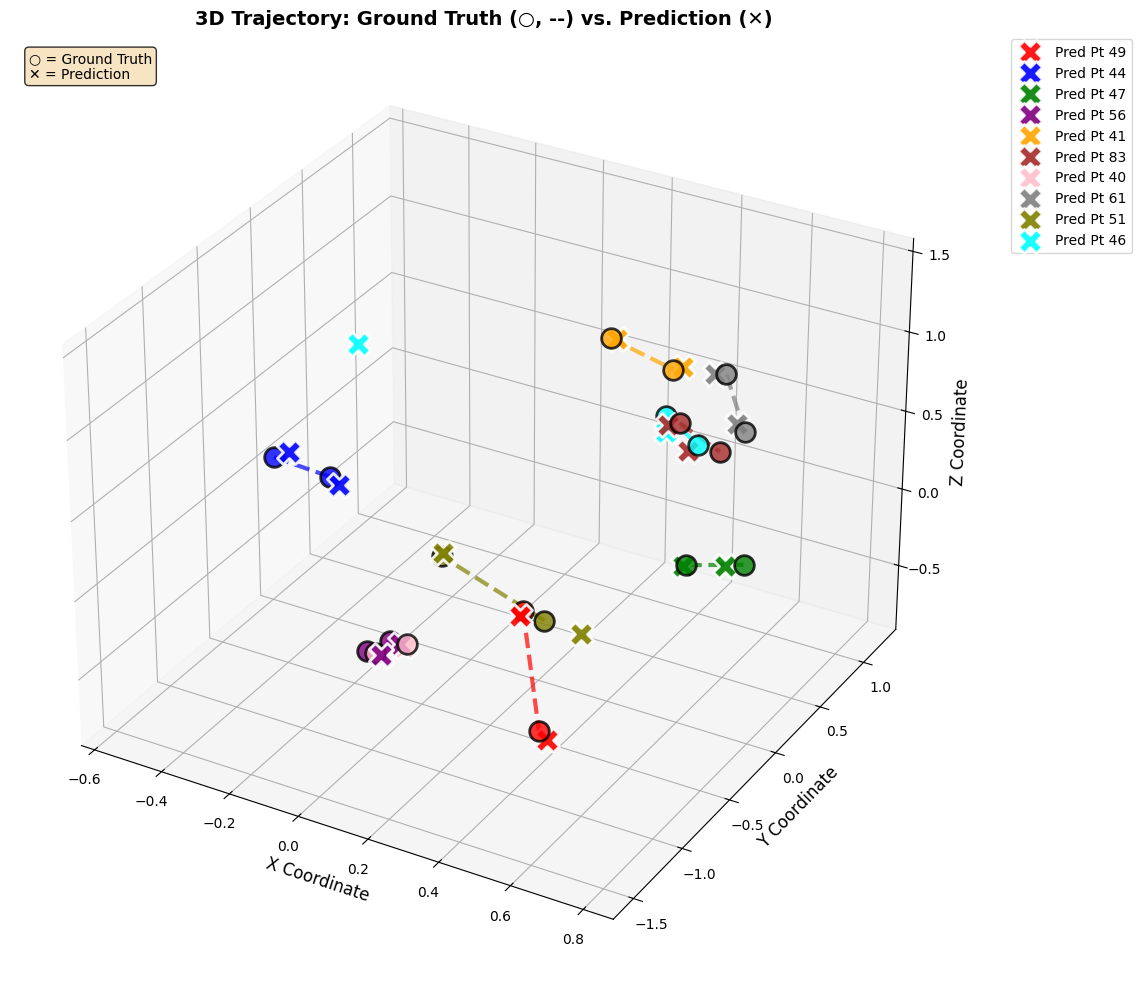

In [5]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import sys
sys.path.append('/mnt/letitia/scratch/students/hhammoud/detr')
from pathlib import Path
from models import build_model
from util.misc import NestedTensor
import random
# random.seed(10)  # For reproducible results
N = 10  # Number of points to plot

# --- Model Loading and Prediction Functions (from 'Death / Birth Rates' section) ---
def load_checkpoint_and_model(checkpoint_path, device):
    """Load checkpoint and build model"""
    checkpoint = torch.load(checkpoint_path, map_location=device, weights_only=False)
    args = checkpoint['args']
    args.use_film = False ################### !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    model, _ = build_model(args)
    model.to(device)
    model.load_state_dict(checkpoint['model'])
    model.eval()
    return model, args

def format_data_for_model(point_cloud_data, device):
    """Format point cloud data for model input"""
    batch_data = point_cloud_data.unsqueeze(0).to(device)
    mask = torch.zeros(1, point_cloud_data.shape[0], dtype=torch.bool, device=device)
    return NestedTensor(batch_data, mask)

# --- Configuration ---
checkpoint_path = "/mnt/letitia/scratch/students/hhammoud/detr/outputs/concat_fixed/checkpoint.pth"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# --- Load Model ---
model, args = load_checkpoint_and_model(checkpoint_path, device)

# --- Load Data and move to GPU ---
tp0_data = torch.load('/mnt/letitia/scratch/students/hhammoud/detr-letitia/IGNORE/data/new_synthetic_huge_clipped/TP0/11.pt').float().to(device)
tp1_data = torch.load('/mnt/letitia/scratch/students/hhammoud/detr-letitia/IGNORE/data/new_synthetic_huge_clipped/TP1/11.pt').float().to(device)
tp2_data = torch.load('/mnt/letitia/scratch/students/hhammoud/detr-letitia/IGNORE/data/new_synthetic_huge_clipped/TP2/11.pt').float().to(device)

# --- Get Predictions ---
with torch.no_grad():
    # Predict TP1 from TP0
    nested_tp0 = format_data_for_model(tp0_data, device)
    outputs_1 = model(nested_tp0)
    pred_coords1 = outputs_1['pred_coordinates'][0]
    pred_subclass1 = outputs_1['pred_subclass'][0].argmax(dim=-1)

    # Predict TP2 from TP1
    nested_tp1 = format_data_for_model(tp1_data, device)
    outputs_2 = model(nested_tp1)
    pred_coords2 = outputs_2['pred_coordinates'][0]
    pred_subclass2 = outputs_2['pred_subclass'][0].argmax(dim=-1)

# --- Data Preparation for Plotting (move to CPU) ---
coords0, ids0 = tp0_data[:, :3].cpu(), tp0_data[:, -1].cpu()
coords1, ids1 = tp1_data[:, :3].cpu(), tp1_data[:, -1].cpu()
coords2, ids2 = tp2_data[:, :3].cpu(), tp2_data[:, -1].cpu()
pred_coords1, pred_coords2 = pred_coords1.cpu(), pred_coords2.cpu()
pred_subclass1, pred_subclass2 = pred_subclass1.cpu(), pred_subclass2.cpu()

# Create mappings from ID to coordinates
map_id_to_coord0 = {int(id_val): coord for id_val, coord in zip(ids0, coords0)}
map_id_to_coord1 = {int(id_val): coord for id_val, coord in zip(ids1, coords1)}
map_id_to_coord2 = {int(id_val): coord for id_val, coord in zip(ids2, coords2)}

# Create mappings from predicted subclass ID to coordinates
map_pred_id_to_coord1 = {int(id_val): coord for id_val, coord in zip(pred_subclass1, pred_coords1)}
map_pred_id_to_coord2 = {int(id_val): coord for id_val, coord in zip(pred_subclass2, pred_coords2)}

# common_ids = sorted(list(set(map_id_to_coord0.keys()).intersection(set(map_id_to_coord1.keys())).intersection(set(map_id_to_coord2.keys()))))
common_ids = sorted(list(set(map_id_to_coord1.keys()).intersection(set(map_id_to_coord2.keys()))))

# Filter for IDs >= 20
filtered_ids = [id_val for id_val in common_ids if id_val >= 20]

# Randomly select N points from filtered IDs
if len(filtered_ids) > 0:
    ids_to_plot = random.sample(filtered_ids, min(N, len(filtered_ids)))
else:
    print("Warning: No IDs >= 20 found, using all available IDs")
    ids_to_plot = random.sample(common_ids, min(N, len(common_ids)))

print(f"Total common IDs: {len(common_ids)}")
print(f"IDs >= 20: {len(filtered_ids)} ({filtered_ids})")
print(f"Randomly selected IDs to plot: {ids_to_plot}")
print(f"Available predicted IDs TP1: {sorted(map_pred_id_to_coord1.keys())}")
print(f"Available predicted IDs TP2: {sorted(map_pred_id_to_coord2.keys())}")

# --- Plotting ---
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Collect all coordinates to determine plot bounds
all_coords = []
for point_id in ids_to_plot:
    # all_coords.extend([map_id_to_coord0[point_id], map_id_to_coord1[point_id], map_id_to_coord2[point_id]])
    all_coords.extend([map_id_to_coord1[point_id], map_id_to_coord2[point_id]])
    if point_id in map_pred_id_to_coord1:
        all_coords.append(map_pred_id_to_coord1[point_id])
    if point_id in map_pred_id_to_coord2:
        all_coords.append(map_pred_id_to_coord2[point_id])

all_coords = torch.stack(all_coords)
x_min, x_max = all_coords[:, 0].min().item(), all_coords[:, 0].max().item()
y_min, y_max = all_coords[:, 1].min().item(), all_coords[:, 1].max().item()
z_min, z_max = all_coords[:, 2].min().item(), all_coords[:, 2].max().item()

# Add some padding
padding = 0.1
x_range, y_range, z_range = x_max - x_min, y_max - y_min, z_max - z_min
x_min -= padding * x_range; x_max += padding * x_range
y_min -= padding * y_range; y_max += padding * y_range
z_min -= padding * z_range; z_max += padding * z_range

for i, point_id in enumerate(ids_to_plot):
    color = colors[i % len(colors)]

    # Ground Truth points
    # c0, c1, c2 = map_id_to_coord0[point_id], map_id_to_coord1[point_id], map_id_to_coord2[point_id]
    c1, c2 = map_id_to_coord1[point_id], map_id_to_coord2[point_id]
    # ax.scatter(c0[0], c0[1], c0[2], c=color, marker='o', s=200, alpha=0.8, edgecolors='black', linewidth=2, label=f'GT Pt {point_id}')
    ax.scatter(c1[0], c1[1], c1[2], c=color, marker='o', s=200, alpha=0.8, edgecolors='black', linewidth=2)
    ax.scatter(c2[0], c2[1], c2[2], c=color, marker='o', s=200, alpha=0.8, edgecolors='black', linewidth=2)
    # ax.plot([c0[0], c1[0], c2[0]], [c0[1], c1[1], c2[1]], [c0[2], c1[2], c2[2]], color=color, linestyle='--', linewidth=3, alpha=0.7)
    ax.plot([c1[0], c2[0]], [c1[1], c2[1]], [c1[2], c2[2]], color=color, linestyle='--', linewidth=3, alpha=0.7)

    # Predicted points (match by ID)
    if point_id in map_pred_id_to_coord1:
        pc1 = map_pred_id_to_coord1[point_id]
        ax.scatter(pc1[0], pc1[1], pc1[2], c=color, marker='X', s=300, alpha=0.9, edgecolors='white', linewidth=2, label=f'Pred Pt {point_id}')
    else:
        print(f"Warning: Point ID {point_id} not found in TP1 predictions")
        
    if point_id in map_pred_id_to_coord2:
        pc2 = map_pred_id_to_coord2[point_id]
        ax.scatter(pc2[0], pc2[1], pc2[2], c=color, marker='X', s=300, alpha=0.9, edgecolors='white', linewidth=2)
    else:
        print(f"Warning: Point ID {point_id} not found in TP2 predictions")

# Set zoomed axis limits
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_zlim(z_min, z_max)

ax.set_xlabel('X Coordinate', fontsize=12)
ax.set_ylabel('Y Coordinate', fontsize=12)
ax.set_zlabel('Z Coordinate', fontsize=12)
ax.set_title('3D Trajectory: Ground Truth (○, --) vs. Prediction (✕)', fontsize=14, fontweight='bold')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
ax.grid(True, alpha=0.3)

# Add text annotations for clarity
ax.text2D(0.02, 0.98, "○ = Ground Truth\n✕ = Prediction", transform=ax.transAxes, 
          fontsize=10, verticalalignment='top', bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()